# Torchvision:
## torchvision.ops:
### ROIAlign
### ROIPool
### NMS
### clip_boxes_to_image
### remove_small_boxes
### ps_roi_align: posotion sensitive roi align


In [2]:
import torch
import torchvision as tv 
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io as io

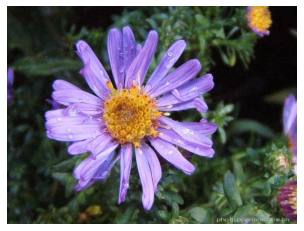

In [3]:
# get a sample image
img_url = "https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimg.pconline.com.cn%2Fimages%2Fphoto2%2F2022339%2F2005%2F10%2F18%2F1129603755536548_mthumb.JPG&refer=http%3A%2F%2Fimg.pconline.com.cn&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1630486741&t=4b944398f1f6c6138e56e47fc2bb1bb1"

img = io.imread(img_url)
plt.axis("off")
plt.imshow(img)
plt.show()

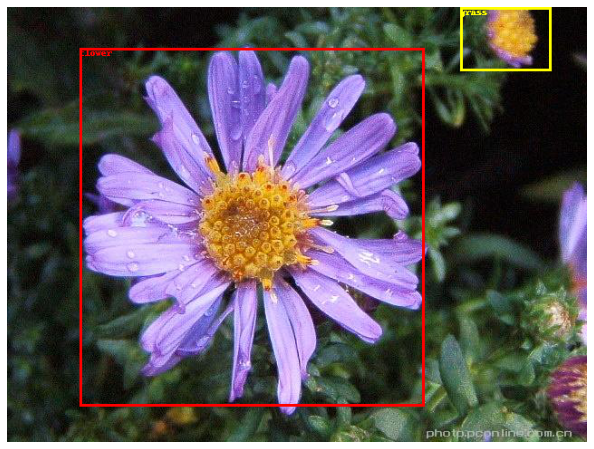

In [4]:
## origin fig
from draw_bbox import draw_bounding_boxes

box = torch.tensor([[80,45,460,440],[500,0,600,70]])
boxed_img = draw_bounding_boxes(torch.tensor(img).permute(2,0,1), 
                                box, 
                                labels=["flower","grass"],
                                colors=["red","yellow"],
                                width=3,
                                font_size=30)
plt.figure(figsize=(12,8))
plt.subplot()
plt.axis("off")
plt.imshow(boxed_img.permute(1,2,0))
plt.show()

torch.Size([3, 480, 640])
torch.Size([3, 240, 320])
torch.Size([3, 120, 160])


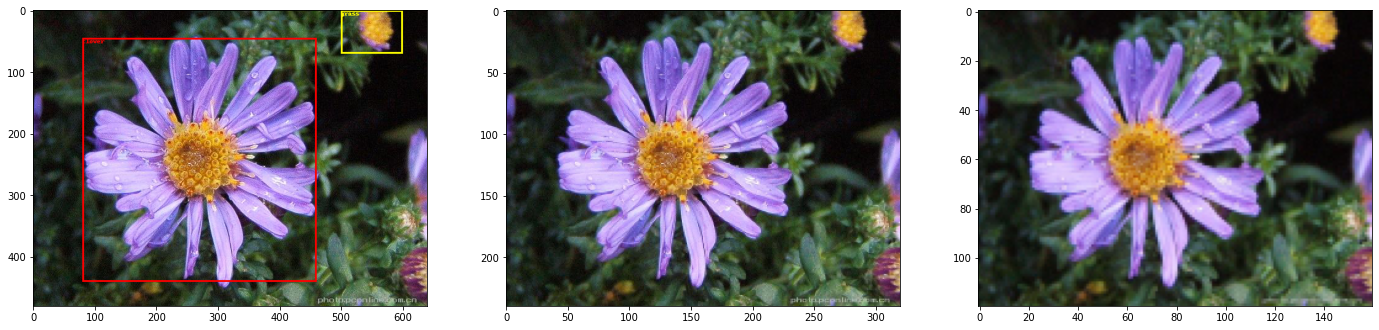

In [16]:
from torchvision.transforms import ToTensor
from torchvision.ops import roi_align, RoIAlign
# 1/2 pooling

i = ToTensor()(img)
print(i.shape)
x1 = torch.nn.functional.avg_pool2d(i, 2, 2, 0)# 1/2
print(x1.shape)
x2 = torch.nn.functional.avg_pool2d(x1, 2, 2, 0)# 1/2
print(x2.shape)
plt.figure(figsize=(24,10))
plt.subplot(131)
plt.imshow(boxed_img.permute(1,2,0))
plt.subplot(132)
plt.imshow(x1.permute(1,2,0))
plt.subplot(133)
plt.imshow(x2.permute(1,2,0))
plt.show()

tensor([[  0.,  80.,  45., 460., 440.],
        [  0., 500.,   0., 600.,  70.]])
torch.Size([2, 3, 64, 64])
torch.Size([2, 3, 32, 32])


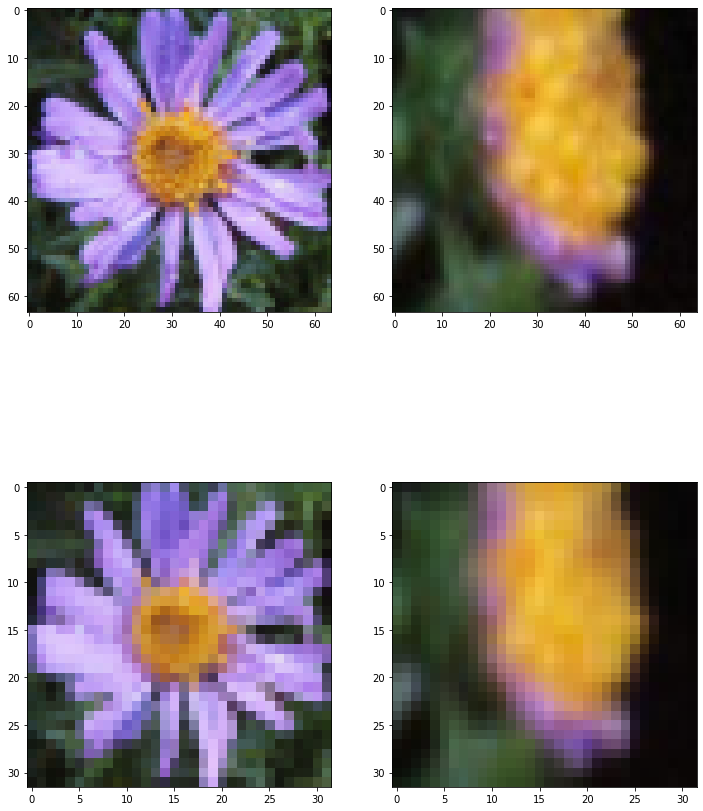

In [43]:
# RoIAlign
# 注意box输入的是没有归一化的绝对坐标
box_5d = torch.cat([torch.zeros(2,1), box.float()], dim=1)
print(box_5d)
## box case 1: with (K,5):第一维是batch_idx
O1 = roi_align(x1.unsqueeze(0), box_5d, (64,64), 0.5)
O2 = roi_align(x2.unsqueeze(0), box_5d, (32,32), 0.25)
## box case 2: list[4d tensor]
# O1 = roi_align(x1.unsqueeze(0), [box.float()], (32,32), 0.5)
# O2 = roi_align(x2.unsqueeze(0), [box.float()], (32,32), 0.25)
print(O1.shape)
print(O2.shape)
plt.figure(figsize=(12,16))
plt.subplot(221)
plt.imshow(O1[0].permute(1,2,0))
plt.subplot(222)
plt.imshow(O1[1].permute(1,2,0))
plt.subplot(223)
plt.imshow(O2[0].permute(1,2,0))
plt.subplot(224)
plt.imshow(O2[1].permute(1,2,0))
plt.show()

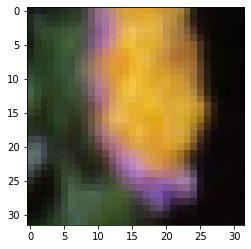

In [30]:
## 

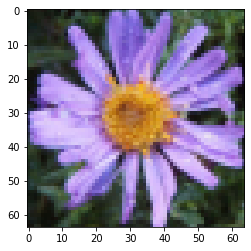

In [26]:
plt.imshow(O1[0].permute(1,2,0))